# **Data Description**

We will be working on the Adults Data Set, which can be found at the UCI Website. In this problem the goal is to predict whether a person income is higher or lower than $50k/year based on their attributes, which indicates that we will be able to use the logistic regression algorithm. The data set has 48,842 observations and 14 features.

#### **Features**
**age**: continuous.

**workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

**fnlwgt** (Final weight of how much of the population it represents): continuous.

**education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, - 10th, Doctorate, 5th-6th, Preschool.

**education-num**: continuous.

**marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

**occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-- inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

**relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

**race**: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
gender: Female, Male.

**capital-gain**: continuous.

**capital-loss**: continuous.

**hours-per-wee**k: continuous.

**native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

**salary**: >50K,<=50K

# **Importing the Libraries**

In [1]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn import metrics

# Tree Visualisation
from sklearn.tree import export_graphviz   
from IPython.display import Image                            
import graphviz          

# **Load The Data**

In [2]:
data = pd.read_csv('/content/adult.csv.zip')
data.head()          

FileNotFoundError: [Errno 2] No such file or directory: '/content/adult.csv.zip'

# **Pre-Processing The Data**

Tree-based models are much more robust to outliers than linear models, and they do not need variables to be normalized to work. As such, we need to do very little preprocessing on our data.

In [ ]:
 # Replace ? with NaN value in the dataset
 data['native.country']=data['native.country'].replace('?',np.nan)
 data['workclass']= data['workclass'].replace('?',np.nan)
 data['occupation']=data['occupation'].replace('?',np.nan)

 #Replace missing values with mode value
 data['workclass'].replace(np.nan,'Private',inplace =True)
 data['occupation'].replace(np.nan,'Prof-specialty',inplace =True)
 data['native.country'].replace(np.nan,'United-States',inplace =True)

In [ ]:
data.duplicated().sum()

24

In [ ]:
data.drop_duplicates()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [ ]:
data['native.country'].value_counts()

United-States                 29753
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                           29
France                      

In [ ]:
data.loc[data['native.country'] != 'United-States', 'native.country'] = 0
data.loc[data['native.country'] == 'United-States', 'native.country'] = 1

In [ ]:
data['education'].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [ ]:
hs_grad = ['HS-grad','9th','10th','11th','12th']
elementary = ['1st-4th','5th-6th','7th-8th']

data['education'].replace(to_replace = hs_grad,value = 'HS-grad',inplace = True)
data['education'].replace(to_replace = elementary,value = 'elementary_school',inplace = True)

In [ ]:
data['marital.status'].value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital.status, dtype: int64

In [ ]:
married = ['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse']
separated = ['Separated','Divorced']

data['marital.status'].replace(to_replace = married, value = "Married",inplace = True)
data['marital.status'].replace(to_replace = separated, value = "Separated",inplace = True)

data['marital.status'].value_counts()

Married          15417
Never-married    10683
Separated         5468
Widowed            993
Name: marital.status, dtype: int64

In [ ]:
self_employed = ['Self-emp-not-inc','Self-emp-inc']
govt_employees = ['Local-gov','State-gov','Federal-gov']

data['workclass'].replace(to_replace = self_employed, value = 'Self_employed',inplace = True)
data['workclass'].replace(to_replace = govt_employees, value = 'Govt_employees',inplace = True)

data['workclass'].value_counts()

Private           24532
Govt_employees     4351
Self_employed      3657
Without-pay          14
Never-worked          7
Name: workclass, dtype: int64

In [ ]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,1,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,1,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,1,<=50K
3,54,Private,140359,elementary_school,4,Separated,Machine-op-inspct,Unmarried,White,Female,0,3900,40,1,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,1,<=50K


In [ ]:
#Import label encoder
from sklearn import preprocessing

#label encoder understands word labels.
label_encoder = preprocessing.LabelEncoder()

cat_cols = data.select_dtypes(include=['object']).columns
for col in cat_cols:
  data[col] = label_encoder.fit_transform(data[col])

data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,2,77053,4,9,3,9,1,4,0,0,4356,40,1,0
1,82,2,132870,4,9,3,3,1,4,0,0,4356,18,1,0
2,66,2,186061,8,10,3,9,4,2,0,0,4356,40,1,0
3,54,2,140359,9,4,2,6,4,4,0,0,3900,40,1,0
4,41,2,264663,8,10,2,9,3,4,0,0,3900,40,1,0


# **Splitting the data**

In [ ]:
# Split the data into features (X) and target (y)
X = data.drop('income', axis=1)
y = data['income']

**Split the data into training and test sets**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Bagging

## 1) Random Forest

### **Fitting and Evaluating The Model**

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf.predict(X_test)

**Evaluating The Model**

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy) 

Accuracy: 0.8512206356517734


### **Visualizing the Results**

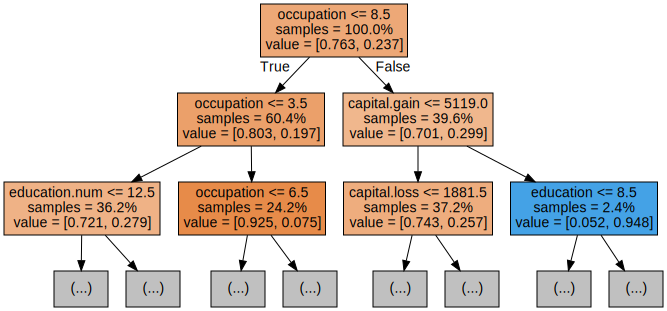

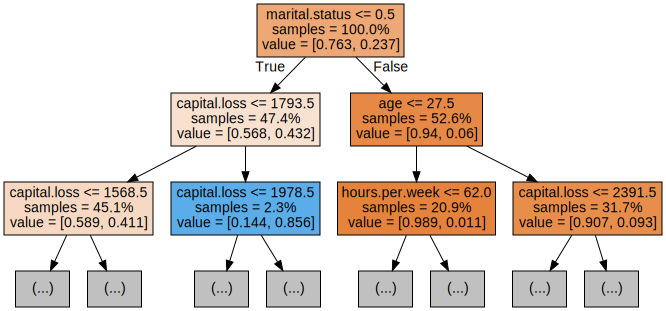

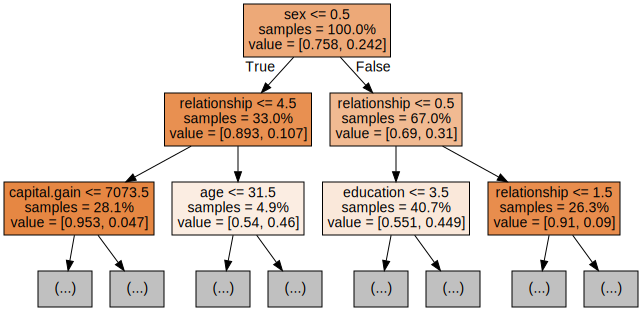

In [ ]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

### **Hyperparameter Tuning**

In [3]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)         

NameError: name 'X_train' is not defined

In [ ]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 17, 'n_estimators': 67}


### **More Evaluation Metrics**

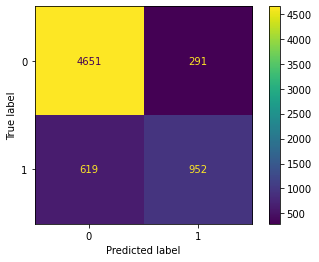

In [ ]:
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
y_pred = best_rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.8602794411177644
Precision: 0.7658889782783588
Recall: 0.6059834500318269


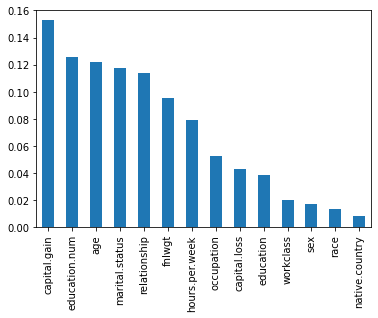

In [ ]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();

# Boosting

## 1) **AdaBoost Classifier**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

**Splitting The Dataset**

In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test


AdaBoost uses Decision Tree Classifier as default Classifier.

Important Parameters in AdaBoost:

base_estimator: It is a weak learner used to train the model. It uses DecisionTreeClassifier as default weak learner for training purpose. You can also specify different machine learning algorithms.

n_estimators: Number of weak learners to train iteratively.

learning_rate: It contributes to the weights of weak learners. It uses 1 as a default value.

### **Fitting and Evaluating The Model**

In [ ]:
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)


In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.8584297266864571


## 2) **XgBoost**

Works best with missing values

Parallel Processing

Handles Large dataset well

### **Fitting and Evaluating The Model**

we fit the classifier with default parameters and evaluate its performance:

In [ ]:
import xgboost as xgb

xgb_cl = xgb.XGBClassifier()

In [ ]:
from sklearn.metrics import accuracy_score

# Init classifier
xgb_cl = xgb.XGBClassifier()

# Fit
xgb_cl.fit(X_train, y_train)

# Predict
preds = xgb_cl.predict(X_test)

In [ ]:
accuracy_score(y_test, preds)

0.8677449073600164

## 3) **Gradient Tree Boosting**

### **Fitting and Evaluating The Model**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# Define Gradient Boosting Classifier with hyperparameters

gbc=GradientBoostingClassifier(n_estimators=500,learning_rate=0.05,random_state=100,max_features=5 )

# Fit train data to GBC

gbc.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.05, max_features=5, n_estimators=500,
                           random_state=100)

In [ ]:
# Predict
preds = xgb_cl.predict(X_test)

In [ ]:
accuracy_score(y_test, preds)

0.8677449073600164

# Conclusion

Accuracies for the models are as follows:
* 86.03 % for Random Forest (After Hyperparameter Tuning)
* 85.84 % for AdaBoost
* 86.77 % for XgBoost
* 86.77 % for Gradient Tree Boosting

Hence, ***XgBoost*** and ***Gradient Tree Boosting*** are the best performing models.